## connectionist models are not reliable for certain tasks

### Example

In [ ]:
"""Neural net to take the product of three numbers 
After https://gist.github.com/qpwo/34983724ed9333225974191798bb672d
"""
from tensorflow.keras import models, layers
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

x = np.random.random((100, 3))
y = np.prod(x, axis=1).reshape(100, 1)

model = models.Sequential([
    layers.Dense(3, activation='relu', input_shape=(3,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='relu')
])
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x, y, epochs=1000)

# small test, to see quality of results

x2 = np.random.random((5, 3))
y2 = np.prod(x2, axis=1).reshape(5,1)
p2 = model.predict(x2)

print("x:\n", x2)
print("y:\n", y2)
print("predicted:\n", p2)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2311
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2169
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2026
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1862
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1690
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1632
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1581
Epoch 13/1000
4/4 [==============================

In [6]:
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic
logic._counter._value = 0

You need to install prover9 for the following code to work.

On ubuntu/debian systems:
```bash
sudo apt install prover9
```

On macos:
```bash
brew install prover9
```

In [9]:
# from http://www.nltk.org/howto/inference.html
from nltk.sem import Expression
p1 = Expression.fromstring('man(socrates)')
p2 = Expression.fromstring('all x.(man(x) -> mortal(x))')
c  = Expression.fromstring('mortal(socrates)')
Prover9().prove(c, [p1,p2])

True

In [10]:
TableauProver().prove(c, [p1, p2])

True

In [11]:
ResolutionProver().prove(c, [p1, p2], verbose=True)

[1] {-mortal(socrates)}     A 
[2] {man(socrates)}         A 
[3] {-man(z2), mortal(z2)}  A 
[4] {-man(socrates)}        (1, 3) 
[5] {mortal(socrates)}      (2, 3) 
[6] {}                      (1, 5) 



True

In [12]:
pip install pyRDF2Vec

     |████████████████████████████████| 382 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 3.5 MB/s eta 0:00:01
  Created wheel for pyRDF2Vec: filename=pyRDF2Vec-0.0.5-py3-none-any.whl size=13333 sha256=f65e3155f75c4f6bd1aabc1c61a47373d3bfe8eb8c6c6638c343daf1b6800bff
  Stored in directory: /Users/ben/Library/Caches/pip/wheels/67/c9/df/e2cfc522ff6cc3f5e3978ad09e759698e9e16ff081d7e76db8
Successfully built pyRDF2Vec
  Attempting uninstall: botocore
    Found existing installation: botocore 1.17.51
    Uninstalling botocore-1.17.51:
      Successfully uninstalled botocore-1.17.51
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

streamlit 0.65.2 requires bot

In [14]:
from rdf2vec.converters import create_kg
import pandas as pd

# get the zoo dataset from https://www.kaggle.com/uciml/zoo-animal-classification#
zoo = pd.read_csv('zoo.csv')

In [15]:
cols = list(zoo.columns)
cols

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [16]:
zoo.columns[zoo.nunique() == 2]

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [17]:
binary_cols = zoo.columns[zoo.nunique() == 2]
binary_cols

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [18]:
for col in binary_cols:
    zoo[col] = zoo[col].astype(bool)

In [19]:
zoo.dtypes

animal_name    object
hair             bool
feathers         bool
eggs             bool
milk             bool
airborne         bool
aquatic          bool
predator         bool
toothed          bool
backbone         bool
breathes         bool
venomous         bool
fins             bool
legs            int64
tail             bool
domestic         bool
catsize          bool
class_type      int64
dtype: object

In [20]:
len(zoo)

101

In [21]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1


In [22]:
training_size = int(len(zoo) * 0.8)

In [23]:
all_labels = {
    i+1: c for i, c in enumerate(
        [
        'Mammal',
        'Bird',
        'Reptile',
        'Fish',
        'Amphibian',
        'Bug',
        'Invertebrate'
        ])
}

In [26]:
from rdf2vec.graph import KnowledgeGraph, Vertex


def get_triplets(row, col):
    """return triplets for binary and integer elements
    
    Format: (s, p, o)
    """
    if col == 'class_type':
        return  (
            all_labels[row[col]],
            'is_a',  # 'has' + col
            row['animal_name'],
        )
    # integer properties:
    if col in ['legs']:
        #if row[col] > 0:
        return (
            row['animal_name'],
            'has' + col,
            str(row[col]) + '_legs'
        )
        #else:
        #    return ()
    # binary properties:
    if row[col]:
        return (
            row['animal_name'],
            'has',  # if row[col] else 'hasno' + col,
            str(col)
        )
    else:
        return ()

triplets = []
for i, row in zoo.iterrows():
    for col in cols:
        if col == 'animal_name':
            continue
        if col == 'class_type' and i > training_size:
                continue
        triplet = get_triplets(row, col)
        if triplet:
            triplets.append(triplet)
    #if i > 5:
    #    break


label_predicates = [] #[ 'is_a' ]
kg = KnowledgeGraph()
for (s, p, o) in triplets:
    if p not in label_predicates:
        s_v = Vertex(str(s))
        o_v = Vertex(str(o))
        p_v = Vertex(str(p), predicate=True, _from=s_v, _to=o_v)
        kg.add_vertex(s_v)
        kg.add_vertex(p_v)
        kg.add_vertex(o_v)
        kg.add_edge(s_v, p_v)
        kg.add_edge(p_v, o_v)

In [27]:
len(triplets)

842

In [28]:
triplets[:20]

[('aardvark', 'has', 'hair'),
 ('aardvark', 'has', 'milk'),
 ('aardvark', 'has', 'predator'),
 ('aardvark', 'has', 'toothed'),
 ('aardvark', 'has', 'backbone'),
 ('aardvark', 'has', 'breathes'),
 ('aardvark', 'haslegs', '4_legs'),
 ('aardvark', 'has', 'catsize'),
 ('Mammal', 'is_a', 'aardvark'),
 ('antelope', 'has', 'hair'),
 ('antelope', 'has', 'milk'),
 ('antelope', 'has', 'toothed'),
 ('antelope', 'has', 'backbone'),
 ('antelope', 'has', 'breathes'),
 ('antelope', 'haslegs', '4_legs'),
 ('antelope', 'has', 'tail'),
 ('antelope', 'has', 'catsize'),
 ('Mammal', 'is_a', 'antelope'),
 ('bass', 'has', 'eggs'),
 ('bass', 'has', 'aquatic')]

In [29]:
triplets[-20:]

[('wasp', 'haslegs', '6_legs'),
 ('wolf', 'has', 'hair'),
 ('wolf', 'has', 'milk'),
 ('wolf', 'has', 'predator'),
 ('wolf', 'has', 'toothed'),
 ('wolf', 'has', 'backbone'),
 ('wolf', 'has', 'breathes'),
 ('wolf', 'haslegs', '4_legs'),
 ('wolf', 'has', 'tail'),
 ('wolf', 'has', 'catsize'),
 ('worm', 'has', 'eggs'),
 ('worm', 'has', 'breathes'),
 ('worm', 'haslegs', '0_legs'),
 ('wren', 'has', 'feathers'),
 ('wren', 'has', 'eggs'),
 ('wren', 'has', 'airborne'),
 ('wren', 'has', 'backbone'),
 ('wren', 'has', 'breathes'),
 ('wren', 'haslegs', '2_legs'),
 ('wren', 'has', 'tail')]

In [30]:
kg = create_kg(triplets, label_predicates=label_predicates)

100%|██████████| 842/842 [00:00<00:00, 38857.09it/s]


In [31]:
kg

/Users/ben/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ben/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


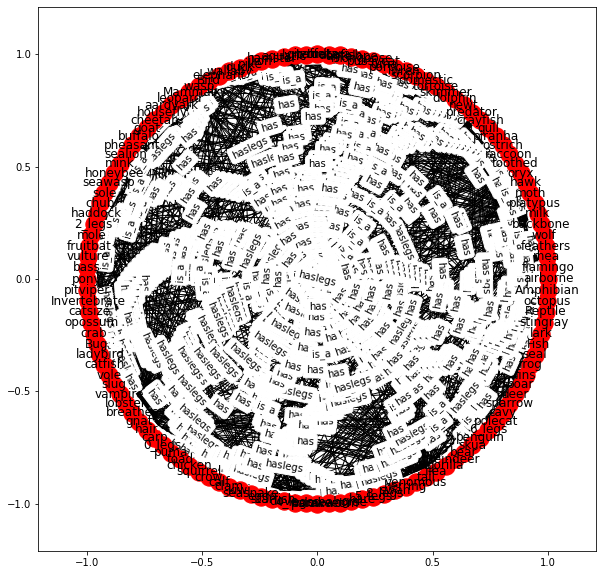

In [32]:
kg.visualise()

In [33]:
entities = list(zoo.animal_name)

In [34]:
from rdf2vec import RDF2VecTransformer
from rdf2vec.walkers import RandomWalker, CommunityWalker
import numpy as np

# We specify the depth and maximum number of walks per entity
random_walker = RandomWalker(5, float('inf'))

transformer = RDF2VecTransformer(vector_size=50, walkers=[random_walker], sg=1)
# Entities should be a list of URIs that can be found in the KG
embeddings = np.array(transformer.fit_transform(kg, entities))

Extracted 754 walks for 101 instances!


In [35]:
embeddings.shape

(101, 50)

In [36]:
zoo.values[training_size:, :-1]

array([['slowworm', False, False, True, False, False, False, True, True,
        True, True, False, False, 0, True, False, False],
       ['slug', False, False, True, False, False, False, False, False,
        False, True, False, False, 0, False, False, False],
       ['sole', False, False, True, False, False, True, False, True,
        True, False, False, True, 0, True, False, False],
       ['sparrow', False, True, True, False, True, False, False, False,
        True, True, False, False, 2, True, False, False],
       ['squirrel', True, False, False, True, False, False, False, True,
        True, True, False, False, 2, True, False, False],
       ['starfish', False, False, True, False, False, True, True, False,
        False, False, False, False, 5, False, False, False],
       ['stingray', False, False, True, False, False, True, True, True,
        True, False, True, True, 0, True, False, True],
       ['swan', False, True, True, False, True, True, False, False, True,
        True, 

In [37]:
zoo.values[:training_size, 1:-1]

array([[True, False, False, ..., False, False, True],
       [True, False, False, ..., True, False, True],
       [False, False, True, ..., True, False, False],
       ...,
       [False, False, True, ..., False, False, False],
       [False, True, True, ..., True, False, False],
       [False, True, True, ..., True, False, False]], dtype=object)

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix
)

# Fit a support vector machine on train embeddings and evaluate on test
clf = SVC(random_state=42)
clf.fit(embeddings[:training_size, :], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = embeddings[training_size:, :]
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.23809523809523808
[[5 0 0 0 0 0 0]
 [4 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [3 0 0 0 0 0 0]]


In [ ]:
[color_map[i] for i in all_labels[:training_size]]

In [44]:
# baseline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score


clf = SVC(random_state=42)
clf.fit(zoo.values[:training_size, 1:-1], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = zoo.values[training_size:, 1:-1]
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.8571428571428571
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]


In [45]:
embeddings[:training_size, :]

array([[-0.01001132, -0.02525392,  0.06960275, ...,  0.15502866,
         0.16011204,  0.0738394 ],
       [-0.02124083, -0.03143897,  0.06947882, ...,  0.14999168,
         0.17350586,  0.06461088],
       [-0.01351023, -0.02223515,  0.0777923 , ...,  0.1656029 ,
         0.2014776 ,  0.0701108 ],
       ...,
       [-0.01447095, -0.0330925 ,  0.07540778, ...,  0.15747508,
         0.18476303,  0.07273882],
       [-0.01615521, -0.03254588,  0.08525735, ...,  0.17520814,
         0.19943546,  0.07954543],
       [-0.00706413, -0.02800808,  0.08506058, ...,  0.16167592,
         0.18534   ,  0.07644872]], dtype=float32)

In [46]:
!pip install -U karateclub networkx node2vec pygraphviz

     |████████████████████████████████| 54 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 2.6 MB/s eta 0:00:01
  Created wheel for karateclub: filename=karateclub-1.0.15-py3-none-any.whl size=87934 sha256=edce8a4ad21ab76f9a24727203e9339bf88096ea09183104255bbd717e965cba
  Stored in directory: /Users/ben/Library/Caches/pip/wheels/3a/8d/60/e48c4ad985f0e3aa94d7ef012800dc7f0f521be04fc9daa013
  Created wheel for node2vec: filename=node2vec-0.3.3-py3-none-any.whl size=5674 sha256=ce629c613a6d2427e59027ea4f34b5d645149529b96968a2463cccf312a5bdb1
  Stored in directory: /Users/ben/Library/Caches/pip/wheels/41/60/64/18cdc6dcdaec46c0e9658d613cc915a934b79a6fbc286795f6
  Created wheel for pygraphviz: filename=pygraphviz-1.6-cp36-cp36m-macosx_10_7_x86_64.whl size=96965 sha256=2ade5bdaf3070fabc120ca6f79ccf887dbb2f1589acbd5ef1fbcb696e27c905f
  St

In [47]:
import matplotlib.pyplot as plt
import networkx as nx

In [48]:
nx_graph = nx.Graph()

In [50]:
nx_graph = nx.Graph()
for (a, p, b) in triplets:
    nx_graph.add_edge(a, b)

In [51]:
A = nx.nx_agraph.to_agraph(nx_graph)

In [52]:
print(A.string()) # print to screen

strict graph "" {
	aardvark -- hair;
	aardvark -- milk;
	aardvark -- predator;
	aardvark -- toothed;
	aardvark -- backbone;
	aardvark -- breathes;
	aardvark -- "4_legs";
	aardvark -- catsize;
	aardvark -- Mammal;
	hair -- antelope;
	hair -- bear;
	hair -- boar;
	hair -- buffalo;
	hair -- calf;
	hair -- cavy;
	hair -- cheetah;
	hair -- deer;
	hair -- elephant;
	hair -- fruitbat;
	hair -- giraffe;
	hair -- girl;
	hair -- goat;
	hair -- gorilla;
	hair -- hamster;
	hair -- hare;
	hair -- honeybee;
	hair -- housefly;
	hair -- leopard;
	hair -- lion;
	hair -- lynx;
	hair -- mink;
	hair -- mole;
	hair -- mongoose;
	hair -- moth;
	hair -- opossum;
	hair -- oryx;
	hair -- platypus;
	hair -- polecat;
	hair -- pony;
	hair -- puma;
	hair -- pussycat;
	hair -- raccoon;
	hair -- reindeer;
	hair -- seal;
	hair -- sealion;
	hair -- squirrel;
	hair -- vampire;
	hair -- vole;
	hair -- wallaby;
	hair -- wasp;
	hair -- wolf;
	milk -- antelope;
	milk -- bear;
	milk -- boar;
	milk -- buffalo;
	milk -- calf;

In [53]:
class Vocabulary:
    """Vocabulary class. Wrapper for dictionaries"""
    label2id = {}
    id2label = {}
    def lookup(self, word):
        """get word id; if not present, insert"""
        if word in self.label2id:
            return self.label2id[word]
        ind = len(self.label2id)
        self.label2id[word] = ind
        return ind
    
    def inverse_lookup(self, index):
        if len(self.id2label) == 0:
            self.id2label = {
                ind: label
                for label, ind in self.label2id.items()
            }
        return self.id2label.get(index, None)
        
vocab = Vocabulary()
nx_graph = nx.Graph()
for (a, p, b) in triplets:
    id1, id2 = vocab.lookup(a), vocab.lookup(b)
    nx_graph.add_edge(id1, id2)

In [54]:
vocab.inverse_lookup(2)

'milk'

In [55]:
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127))

In [56]:
trainamals = [
    vocab.label2id[animal]
    for animal in zoo.animal_name.values[:training_size]
]

In [57]:
testimals = [
    vocab.label2id[animal]
    for animal in zoo.animal_name.values[training_size:]
]

In [58]:
import networkx as nx
from karateclub.node_embedding.neighbourhood import Walklets

model_w = Walklets(dimensions=5)
model_w.fit(nx_graph)
embedding = model_w.get_embedding()

In [60]:
# Fit a support vector machine on train embeddings and evaluate on test
clf = SVC(random_state=42)
clf.fit(embedding[trainamals, :], zoo.class_type[:training_size])

test_labels = zoo.class_type[training_size:]
test_embeddings = embedding[testimals, :]
print(end='Support Vector Machine: Accuracy: ')
print('{:.3f}'.format(
        accuracy_score(test_labels, clf.predict(test_embeddings))
))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy: 0.762
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 1 0 0 2]]


In [61]:
from karateclub import LabelPropagation

model_lp = LabelPropagation()
model_lp.fit(nx_graph)
cluster_membership = model_lp.get_memberships()
cluster_membership = np.array([cluster_membership[node] for node in range(len(cluster_membership))])

In [62]:
cluster_membership.reshape(-1, 1).shape

(128, 1)

In [63]:
clf = SVC(random_state=42)
clf.fit(
    np.concatenate(
        [
            #zoo.values[:training_size, 1:-1],
            embedding[trainamals, :],
            #cluster_membership[trainamals].reshape(-1, 1)
        ],
        axis=1
    ),
    zoo.class_type[:training_size]
)

test_labels = zoo.class_type[training_size:]
test_embeddings = np.concatenate(
    [
        #zoo.values[training_size:, 1:-1],
        embedding[testimals, :],
        #cluster_membership[testimals].reshape(-1, 1)
    ], axis=1
)
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.7619047619047619
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 1 0 0 2]]


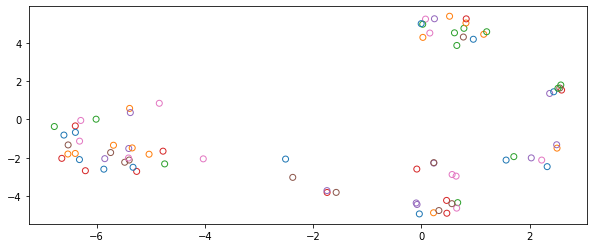

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import itertools

walk_tsne = TSNE(random_state=42)
X_walk_tsne = walk_tsne.fit_transform(embedding[trainamals + testimals, :])

# Define a color map

palette = itertools.cycle(sns.color_palette())
color_map = {}
for i, label in enumerate(set(all_labels)):
    color_map[label] = next(palette)

# Plot the train embeddings
plt.figure(figsize=(10, 4))
plt.scatter(
    X_walk_tsne[:training_size, 0],
    X_walk_tsne[:training_size, 1],
    edgecolors=[color_map[i] for i in all_labels],
    facecolors='none',
)

In [65]:
from node2vec import Node2Vec

node2vec = Node2Vec(
    nx_graph, 
    dimensions=9, 
    walk_length=30, 
    num_walks=200, 
    workers=4
)

Computing transition probabilities: 100%|██████████| 128/128 [00:00<00:00, 517.16it/s]


In [66]:
model_n2v = node2vec.fit(window=10, min_count=1, batch_words=4)

In [67]:
model_n2v.wv.get_vector('0')

array([-0.98137563, -1.5541772 ,  0.174435  ,  1.1330626 , -2.232591  ,
       -0.28878462, -1.0754933 ,  0.90439093, -0.7833465 ], dtype=float32)

In [68]:
train_embeddings = np.concatenate(
    [
        model_n2v.wv.get_vector(
            str(vocab.lookup(a))
        ).reshape(1, -1)
        for a in zoo.animal_name.values[:training_size]
    ], axis=0
)
test_embeddings = np.concatenate(
    [
        model_n2v.wv.get_vector(
            str(vocab.lookup(a))
        ).reshape(1, -1)
        for a in zoo.animal_name.values[training_size:]
    ], axis=0
)

In [69]:
test_embeddings.shape

(21, 9)

In [70]:
train_embeddings[0]

array([-0.98137563, -1.5541772 ,  0.174435  ,  1.1330626 , -2.232591  ,
       -0.28878462, -1.0754933 ,  0.90439093, -0.7833465 ], dtype=float32)

In [71]:
clf = SVC(random_state=42)
clf.fit(
    np.concatenate(
        [
            #zoo.values[:training_size, 1:-1],
            train_embeddings,
            #cluster_membership[trainamals].reshape(-1, 1)
        ],
        axis=1
    ),
    zoo.class_type[:training_size]
)

test_labels = zoo.class_type[training_size:]
test_embeddings = np.concatenate(
    [
        #zoo.values[training_size:, 1:-1],
        test_embeddings,
        #cluster_membership[testimals].reshape(-1, 1)
    ], axis=1
)
print(end='Support Vector Machine: Accuracy = ')
print(accuracy_score(test_labels, clf.predict(test_embeddings)))
print(confusion_matrix(test_labels, clf.predict(test_embeddings)))

Support Vector Machine: Accuracy = 0.7619047619047619
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [2 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 2 0 0 1]]
